In [1]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
# Loading file -- in windows it is like this 
my_df = pd.read_csv('data_file1.txt', sep="\t", header=0)

In [3]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
ID       1000 non-null int64
A1       998 non-null object
A2       1000 non-null object
A3       999 non-null object
A4       1000 non-null int64
A5       998 non-null float64
A6       1000 non-null int64
A7       1000 non-null int64
A8       997 non-null float64
A9       1000 non-null int64
A10      997 non-null float64
A11      0 non-null float64
A12      999 non-null object
A13      1000 non-null object
A14      3 non-null float64
A15      3 non-null object
A16      997 non-null float64
A17      1000 non-null int64
A18      998 non-null float64
A19      1000 non-null int64
A20      1000 non-null int64
A21      995 non-null object
A22      998 non-null object
A23      999 non-null object
A24      1000 non-null object
A25      1000 non-null object
A26      1000 non-null object
A27      1000 non-null object
A28      999 non-null object
A29      1000 non-null object
A30      997 non

In [4]:
# a bird's eye view of the whole data
with pd.option_context('display.max_rows', 1000, 'display.max_columns', 32):
    print(my_df)

       ID   A1  A2   A3  A4   A5  A6  A7    A8  A9      A10  A11  A12 A13  \
0       1   V1  V1   V2   1  2.0   1   1  24.0  30   7721.0  NaN    T   F   
1       2   V1  V2   V1   4  2.0   2   1  30.0  25   5771.0  NaN    T   F   
2       3   V1  V1   V1   4  3.0   2   2  24.0  34   2825.0  NaN    T   F   
3       4   V1  V1   V1   2  3.0   1   1  39.0  32  11760.0  NaN    T   F   
4       5   V2  V2   V1   4  2.0   2   1  14.0  27    802.0  NaN    T   F   
5       6   V1  V2   V1   4  3.0   2   1  12.0  35    691.0  NaN    T   F   
6       7   V2  V2   V1   4  4.0   2   1  15.0  38   1308.0  NaN    T   F   
7       8   V1  V2   V1   1  4.0   1   1   6.0  32   4611.0  NaN    T   F   
8       9   V2  V2   V1   4  2.0   1   1  24.0  29   2333.0  NaN    T   F   
9      10   V2  V2   V1   4  4.0   2   1   9.0  27   1082.0  NaN    T   F   
10     11   V1  V2   V1   2  2.0   1   1  15.0  25   1264.0  NaN    T   F   
11     12   V1  V1   V1   4  2.0   3   1  15.0  35   2728.0  NaN    T   F   

# Analyzing the data

In [5]:
# checking number of 1.0 class examples in the data
index_names = my_df[ my_df['Class'] == 1.0 ].index

In [6]:
# examples labeled as 1.0
index_names.size

650

In [7]:
# checking number of 0.0 lebel class examples in the data
index_names = my_df[ my_df['Class'] == 0.0 ].index

In [8]:
# examples labeled as 0.0
index_names.size

250

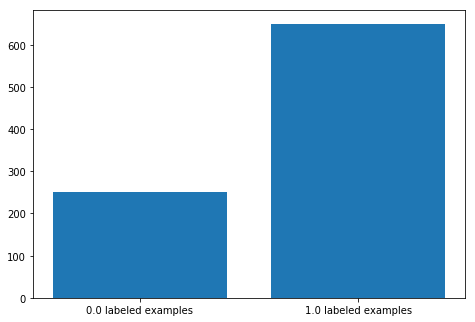

In [12]:
# This shows that there is somewhat class imbalance present in th dataset
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
classes = ['1.0 labeled examples', '0.0 labeled examples']
num_example = [650,250]
ax.bar(classes,num_example)
plt.show()

In [10]:
# checking null columns
null_columns=my_df.columns[my_df.isnull().any()]

In [13]:
my_df[null_columns].isnull().sum()

A1          2
A3          1
A5          2
A8          3
A10         3
A11      1000
A12         1
A14       997
A15       997
A16         3
A18         2
A21         5
A22         2
A23         1
A28         1
A30         3
Class     100
dtype: int64

In [14]:
# it appears that A11, A14, A15 columns have Null values in almost all places except a few
# it is advisible to remove these columns from the data
# Dropping these columns now
my_df = my_df.drop(['A11'], axis=1)
my_df = my_df.drop(['A14'], axis=1)
my_df = my_df.drop(['A15'], axis=1)

# checking statu of null columns now
null_columns=my_df.columns[my_df.isnull().any()]
my_df[null_columns].isnull().sum()

A1         2
A3         1
A5         2
A8         3
A10        3
A12        1
A16        3
A18        2
A21        5
A22        2
A23        1
A28        1
A30        3
Class    100
dtype: int64

In [15]:
# Columns which do not have any null value
not_null_columns=my_df.columns[my_df.notnull().all()]
my_df[not_null_columns].notnull().sum()

ID     1000
A2     1000
A4     1000
A6     1000
A7     1000
A9     1000
A13    1000
A17    1000
A19    1000
A20    1000
A24    1000
A25    1000
A26    1000
A27    1000
A29    1000
dtype: int64

In [16]:
# dropping ID column as it has no significance
my_df = my_df.drop(['ID'], axis=1)

In [17]:
# verifying ID drop
my_df.head(3)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A22,A23,A24,A25,A26,A27,A28,A29,A30,Class
0,V1,V1,V2,1,2.0,1,1,24.0,30,7721.0,...,V2,V3,V1,V5,V2,V1,V2,V1,V1,1.0
1,V1,V2,V1,4,2.0,2,1,30.0,25,5771.0,...,V1,V1,V2,V3,V2,V1,V4,V1,V1,1.0
2,V1,V1,V1,4,3.0,2,2,24.0,34,2825.0,...,V1,V6,V1,V3,V1,V1,V3,V1,V1,1.0


In [18]:
# removing those rows which have null values througout the dataframe
my_df = my_df.dropna()
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879 entries, 0 to 899
Data columns (total 28 columns):
A1       879 non-null object
A2       879 non-null object
A3       879 non-null object
A4       879 non-null int64
A5       879 non-null float64
A6       879 non-null int64
A7       879 non-null int64
A8       879 non-null float64
A9       879 non-null int64
A10      879 non-null float64
A12      879 non-null object
A13      879 non-null object
A16      879 non-null float64
A17      879 non-null int64
A18      879 non-null float64
A19      879 non-null int64
A20      879 non-null int64
A21      879 non-null object
A22      879 non-null object
A23      879 non-null object
A24      879 non-null object
A25      879 non-null object
A26      879 non-null object
A27      879 non-null object
A28      879 non-null object
A29      879 non-null object
A30      879 non-null object
Class    879 non-null float64
dtypes: float64(6), int64(7), object(15)
memory usage: 199.1+ KB


In [19]:
# a bird's eye view of the whole data
with pd.option_context('display.max_rows', 1000, 'display.max_columns', 32):
    print(my_df)

     A1  A2  A3  A4   A5  A6  A7    A8  A9      A10 A12 A13    A16  A17  \
0    V1  V1  V2   1  2.0   1   1  24.0  30   7721.0   T   F   63.0  127   
1    V1  V2  V1   4  2.0   2   1  30.0  25   5771.0   T   F   76.0   94   
2    V1  V1  V1   4  3.0   2   2  24.0  34   2825.0   T   F  121.0  104   
3    V1  V1  V1   2  3.0   1   1  39.0  32  11760.0   T   F  101.0  108   
4    V2  V2  V1   4  2.0   2   1  14.0  27    802.0   T   F   79.0  115   
5    V1  V2  V1   4  3.0   2   1  12.0  35    691.0   T   F  100.0   51   
7    V1  V2  V1   1  4.0   1   1   6.0  32   4611.0   T   F  110.0   83   
8    V2  V2  V1   4  2.0   1   1  24.0  29   2333.0   T   F  123.0   96   
9    V2  V2  V1   4  4.0   2   1   9.0  27   1082.0   T   F  109.0  106   
10   V1  V2  V1   2  2.0   1   1  15.0  25   1264.0   T   F   97.0   88   
11   V1  V1  V1   4  2.0   3   1  15.0  35   2728.0   T   F   94.0  117   
12   V1  V2  V1   4  4.0   1   2  18.0  43   2899.0   T   F  103.0  112   
13   V1  V2  V1   4  2.0 

In [20]:
# Column A12 and A13 does not have variance so their presence or absence does not count
list_A12 = my_df['A12'].values
print(len(list_A12))
'F' in list_A12

879


False

In [21]:
list_A13 = my_df['A13'].values
print(len(list_A13))
'T' in list_A13

879


False

In [22]:
# Now dropping these columns as well for dimensionality reduction
my_df = my_df.drop(['A12'], axis=1)
my_df = my_df.drop(['A13'], axis=1)

my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879 entries, 0 to 899
Data columns (total 26 columns):
A1       879 non-null object
A2       879 non-null object
A3       879 non-null object
A4       879 non-null int64
A5       879 non-null float64
A6       879 non-null int64
A7       879 non-null int64
A8       879 non-null float64
A9       879 non-null int64
A10      879 non-null float64
A16      879 non-null float64
A17      879 non-null int64
A18      879 non-null float64
A19      879 non-null int64
A20      879 non-null int64
A21      879 non-null object
A22      879 non-null object
A23      879 non-null object
A24      879 non-null object
A25      879 non-null object
A26      879 non-null object
A27      879 non-null object
A28      879 non-null object
A29      879 non-null object
A30      879 non-null object
Class    879 non-null float64
dtypes: float64(6), int64(7), object(13)
memory usage: 185.4+ KB


# String Encoding

In [23]:
# Columns with string values needed to be encoded
# A1 A2 A3 A12 A13 A21 A22 A23 A24 A25 A26 A27 A28 A29 A30
# In total, 15 columns are needed to be ecoded


In [24]:
# cheking data types
my_df.dtypes

A1        object
A2        object
A3        object
A4         int64
A5       float64
A6         int64
A7         int64
A8       float64
A9         int64
A10      float64
A16      float64
A17        int64
A18      float64
A19        int64
A20        int64
A21       object
A22       object
A23       object
A24       object
A25       object
A26       object
A27       object
A28       object
A29       object
A30       object
Class    float64
dtype: object

In [25]:
str_cols = ["A1", "A2", "A3", "A21", "A22", "A23", "A24", "A25", "A26", "A27", "A28", "A29", "A30"]
print(len(str_cols))
    

13


In [26]:
# Label Encoding -- I've made a choice of encoding these column values like this. But it could be one-hot encoding
# depending upon what is the significance of these columns in the data and what they mean
# first converting the columns to pandas category type then encoding their values
for item in str_cols:
    my_df[item] = my_df[item].astype('category')
my_df.dtypes

A1       category
A2       category
A3       category
A4          int64
A5        float64
A6          int64
A7          int64
A8        float64
A9          int64
A10       float64
A16       float64
A17         int64
A18       float64
A19         int64
A20         int64
A21      category
A22      category
A23      category
A24      category
A25      category
A26      category
A27      category
A28      category
A29      category
A30      category
Class     float64
dtype: object

In [27]:
for item in str_cols:
    my_df[item] = my_df[item].cat.codes


In [28]:
# checking string encoding of relevent columns
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(my_df)

     A1  A2  A3  A4   A5  A6  A7    A8  A9      A10    A16  A17      A18  \
0     0   0   1   1  2.0   1   1  24.0  30   7721.0   63.0  127  12230.0   
1     0   1   0   4  2.0   2   1  30.0  25   5771.0   76.0   94  11880.0   
2     0   0   0   4  3.0   2   2  24.0  34   2825.0  121.0  104   9430.0   
3     0   0   0   2  3.0   1   1  39.0  32  11760.0  101.0  108  10210.0   
4     1   1   0   4  2.0   2   1  14.0  27    802.0   79.0  115   7590.0   
5     0   1   0   4  3.0   2   1  12.0  35    691.0  100.0   51   6470.0   
7     0   1   0   1  4.0   1   1   6.0  32   4611.0  110.0   83   9470.0   
8     1   1   0   4  2.0   1   1  24.0  29   2333.0  123.0   96   7430.0   
9     1   1   0   4  4.0   2   1   9.0  27   1082.0  109.0  106   8150.0   
10    0   1   0   2  2.0   1   1  15.0  25   1264.0   97.0   88  10430.0   
11    0   0   0   4  2.0   3   1  15.0  35   2728.0   94.0  117   9650.0   
12    0   1   0   4  4.0   1   2  18.0  43   2899.0  103.0  112  10090.0   
13    0   1 

# Test-Train

In [29]:
# Train Test Split
examples = my_df.copy()
examples = examples.drop(["Class"], axis=1)

In [30]:
ground_truth = my_df["Class"]
print(len(ground_truth))
print(ground_truth.head(3))

879
0    1.0
1    1.0
2    1.0
Name: Class, dtype: float64


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(examples, ground_truth, test_size=0.3, random_state=42, shuffle=True)

# Logistic Regression

In [33]:
# Applying Logistic Regression for classificaiton
from sklearn.linear_model import LogisticRegression

In [34]:
# with default parameters
logisticRegr = LogisticRegression()

In [35]:
logisticRegr.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [36]:
predictions = logisticRegr.predict(X_test)

In [37]:
score = logisticRegr.score(X_test, y_test)

In [38]:
print("Accurcy is: {}%".format(score*100))

Accurcy is: 71.96969696969697%


In [40]:
# Confusion Matrix

In [41]:
from sklearn import metrics
my_cm = metrics.confusion_matrix(y_test, predictions)
print(my_cm)

[[  3  67]
 [  7 187]]


In [42]:
# Precison
# Recall
# F1 Score
print('clasification report:\n', sklearn.metrics.classification_report(y_test,predictions))

clasification report:
               precision    recall  f1-score   support

         0.0       0.30      0.04      0.07        70
         1.0       0.74      0.96      0.83       194

   micro avg       0.72      0.72      0.72       264
   macro avg       0.52      0.50      0.45       264
weighted avg       0.62      0.72      0.63       264

